This notebook uses the Velodrome architecture with CNV data as input data.

Velodrome reference: https://www.nature.com/articles/s42256-021-00408-w

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys

sys.path.append("../../vae_zinb_reprn/")
sys.path.append("../src/")

In [3]:
import datetime
import logging
import os
import time
import torch
import random

In [4]:
from dataset import (
    AggCategoricalAnnotatedCellLineDataset,
    AggCategoricalAnnotatedPdxDataset,
    AggCategoricalAnnotatedTcgaDataset    
)

In [5]:
from VelodromeModel import VelodromeTestBedCNV

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

### PACLITAXEL

In [7]:
best_parameters = {'ldr': 0.16667340393178165,
 'lr': 0.199186170110479,
 'lr1': 0.034169258074834945,
 'lr2': 0.4677709839679301,
 'wd': 0.02884325820952654,
 'wd1': 0.08661143336445093,
 'wd2': 0.049682230371981856,
 'bs': 47,
 'epoch': 53,
 'lam1': 0.4,
 'hd': 2,
 'gpu': 0,
 'seed': 42,
 'lam2': 0.6}

In [8]:
model_PACLITAXEL = VelodromeTestBedCNV('PACLITAXEL')
model_PACLITAXEL.train_model(best_parameters)


-------------------- PACLITAXEL --------------------
Cell-line dataset for training Predictor 1: (243, 324)
Cell-line dataset for training Predictor 2: (243, 324)
Total no. of cell-lines for training: 486
TCGA dataset for training both Predictors: (460, 324)
Total no. of cell-lines for evaluation: 122


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: 0.44394185483229337


In [9]:
model_PACLITAXEL.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,PACLITAXEL,31,0.663043,0.881171,0.247268,0.179892,0.265503,0.148862


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


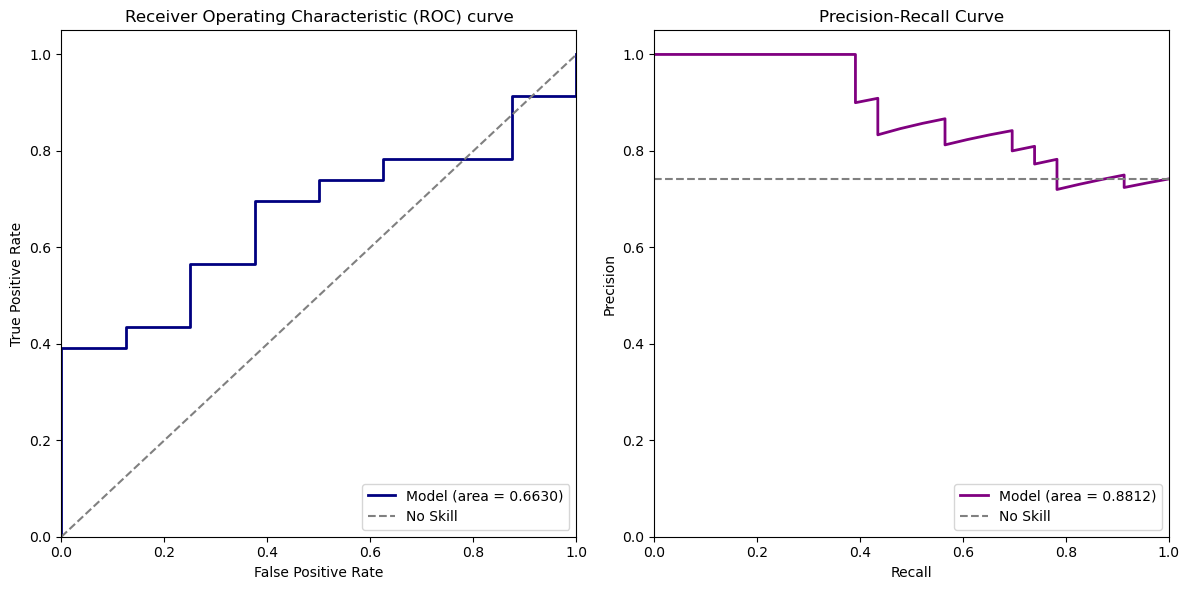

In [10]:
%matplotlib inline
model_PACLITAXEL.get_roc_pr_curves('PACLITAXEL', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [11]:
model_PACLITAXEL.get_velodrome_results_df(AggCategoricalAnnotatedPdxDataset(is_train=None, only_cat_one_drugs=True)) # only 1 class label in test split for each drug

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


Dataset has only 1 class label for PACLITAXEL


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,PACLITAXEL,8,NaN,-0.0,NaN,NaN,NaN,NaN


In [12]:
model_PACLITAXEL.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,PACLITAXEL,68,0.497614,0.000016,0.500013,0.000014


In [13]:
model_PACLITAXEL.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,PACLITAXEL,608,0.280668,1.808264e-12,0.295534,1.014668e-13


### CISPLATIN

In [14]:
best_parameters = {'ldr': 0.15650012463331223,
 'lr': 0.453393442094326,
 'lr1': 0.41976546999812125,
 'lr2': 0.06498492643237114,
 'wd': 0.0995179471731186,
 'wd1': 0.02392115854173899,
 'wd2': 0.06986873297691346,
 'lam1': 0.1,
 'bs': 45,
 'hd': 1,
 'epoch': 50,
 'gpu': 0,
 'seed': 42}

In [15]:
model_CISPLATIN = VelodromeTestBedCNV('CISPLATIN')
model_CISPLATIN.train_model(best_parameters)


-------------------- CISPLATIN --------------------
Cell-line dataset for training Predictor 1: (193, 324)
Cell-line dataset for training Predictor 2: (193, 324)
Total no. of cell-lines for training: 386
TCGA dataset for training both Predictors: (460, 324)
Total no. of cell-lines for evaluation: 97


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: 0.4068476594130603


In [16]:
model_CISPLATIN.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CISPLATIN,36,0.563786,0.837077,0.095716,0.578686,0.077418,0.653583


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


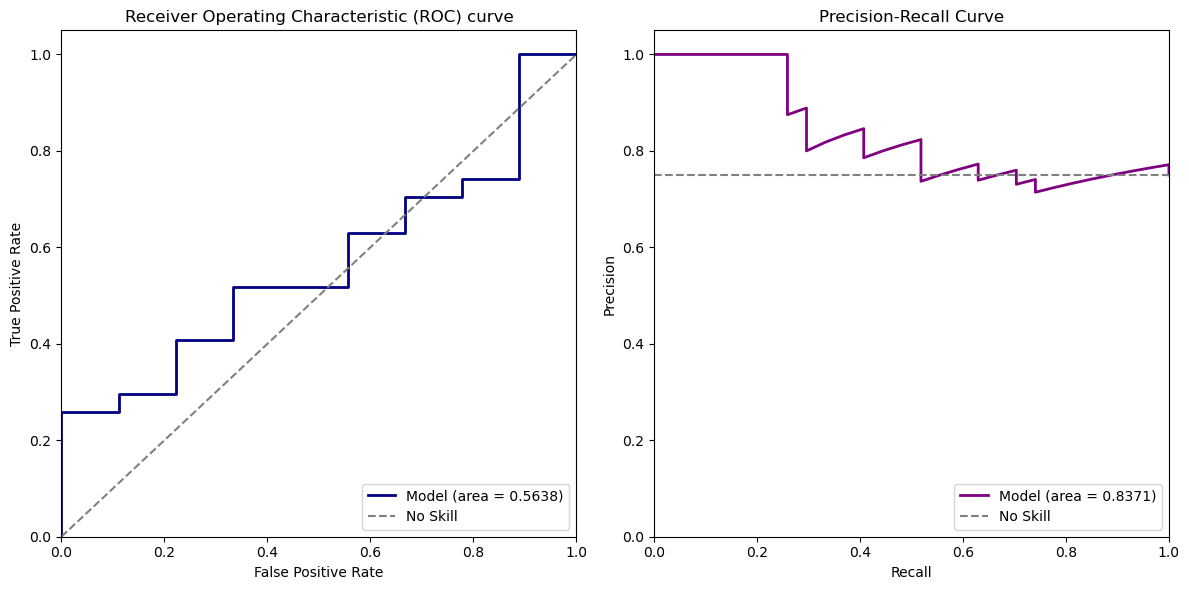

In [17]:
%matplotlib inline
model_CISPLATIN.get_roc_pr_curves('CISPLATIN', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [18]:
model_CISPLATIN.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CISPLATIN,54,0.1336,0.335492,0.178411,0.196788


In [19]:
model_CISPLATIN.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CISPLATIN,483,0.271984,1.225230e-09,0.315086,1.359503e-12


### 5-FLUOROURACIL

In [20]:
best_parameters = {'ldr': 0.3,
 'lr': 0.005964478007917781,
 'lr1': 0.006978465564263141,
 'lr2': 0.004220233119840565,
 'wd': 0.3701443944571374,
 'wd1': 0.1613251179646269,
 'wd2': 0.12850902960550414,
 'lam1': 0.6,
 'bs': 70,
 'epoch': 35,
 'hd': 2,
 'gpu': 0,
 'seed': 42,
 'lam2': 0.4}

In [21]:
model_5_FLUOROURACIL = VelodromeTestBedCNV('5-FLUOROURACIL')
model_5_FLUOROURACIL.train_model(best_parameters)


-------------------- 5-FLUOROURACIL --------------------
Cell-line dataset for training Predictor 1: (211, 324)
Cell-line dataset for training Predictor 2: (211, 324)
Total no. of cell-lines for training: 422
TCGA dataset for training both Predictors: (460, 324)
Total no. of cell-lines for evaluation: 106


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: 0.2639212287597147


In [22]:
model_5_FLUOROURACIL.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,5-FLUOROURACIL,21,0.757353,0.944926,0.350581,0.119205,0.2116,0.357163


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


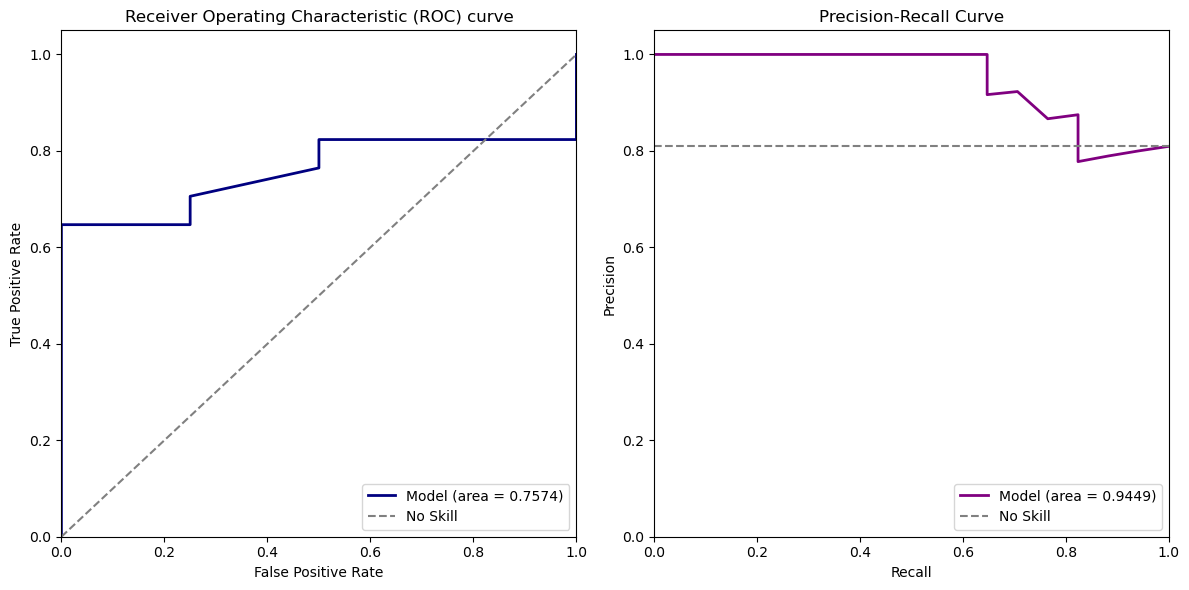

In [23]:
%matplotlib inline
model_5_FLUOROURACIL.get_roc_pr_curves('5-FLUOROURACIL', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [24]:
model_5_FLUOROURACIL.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,5-FLUOROURACIL,61,-0.417663,0.000811,-0.300658,0.018553


In [25]:
model_5_FLUOROURACIL.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,5-FLUOROURACIL,528,0.169665,0.000089,0.234873,4.740906e-08


### CYCLOPHOSPHAMIDE

In [26]:
best_parameters = {'ldr': 0.16929108707667775,
 'lr': 0.09704183822787615,
 'lr1': 0.29340544628794973,
 'lr2': 0.46611013770951515,
 'wd': 0.03601950676853878,
 'wd1': 0.017236028029806283,
 'wd2': 0.014066363577788269,
 'lam1': 0.9,
 'bs': 33,
 'epoch': 52,
 'hd': 2,
 'gpu': 0,
 'seed': 42}

In [27]:
model_CYCLOPHOSPHAMIDE = VelodromeTestBedCNV('CYCLOPHOSPHAMIDE')
model_CYCLOPHOSPHAMIDE.train_model(best_parameters)


-------------------- CYCLOPHOSPHAMIDE --------------------
Cell-line dataset for training Predictor 1: (231, 324)
Cell-line dataset for training Predictor 2: (232, 324)
Total no. of cell-lines for training: 463
TCGA dataset for training both Predictors: (460, 324)
Total no. of cell-lines for evaluation: 116


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: 0.2635409209666957


In [28]:
model_CYCLOPHOSPHAMIDE.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CYCLOPHOSPHAMIDE,19,0.705882,0.962802,0.219179,0.367296,0.17785,0.466344


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


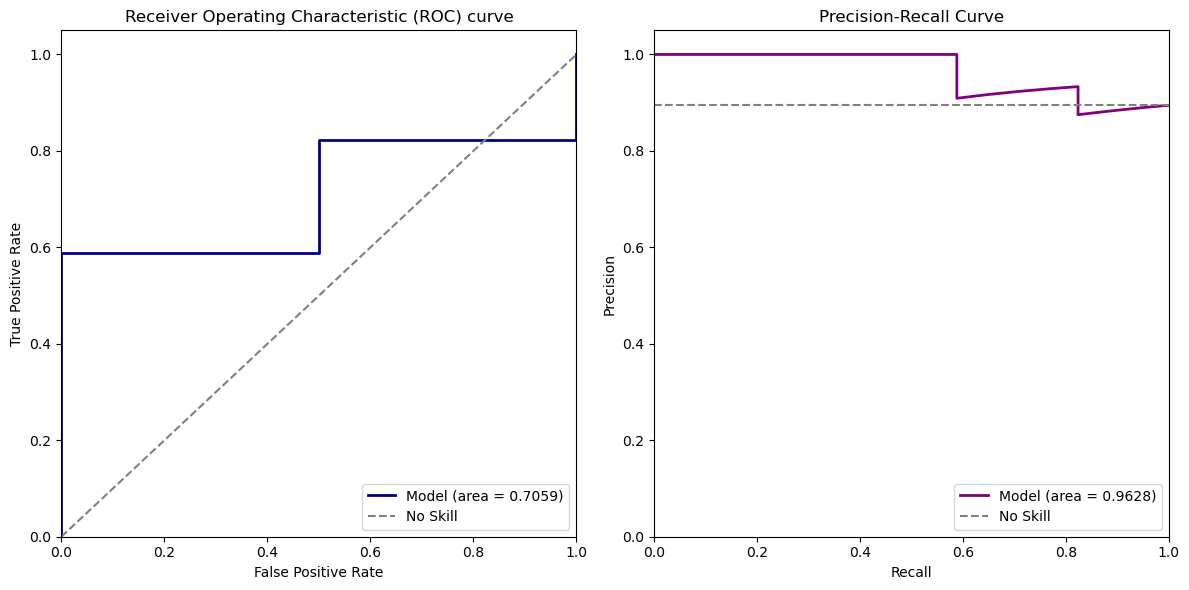

In [29]:
%matplotlib inline
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves('CYCLOPHOSPHAMIDE', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [30]:
model_CYCLOPHOSPHAMIDE.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CYCLOPHOSPHAMIDE,66,0.317775,0.009321,0.410342,0.000622


In [31]:
model_CYCLOPHOSPHAMIDE.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,CYCLOPHOSPHAMIDE,579,0.165963,0.00006,0.268184,5.390191e-11


### GEMCITABINE

In [32]:
best_parameters = {'ldr': 0.03949838689994067,
 'lr': 0.2126072407886386,
 'lr1': 0.1925605489294976,
 'lr2': 0.010377388941124083,
 'wd': 0.0361973168194294,
 'wd1': 0.0730298561597243,
 'wd2': 0.05558472497081385,
 'lam1': 0.2,
 'bs': 59,
 'epoch': 84,
 'hd': 2,
 'gpu': 0,
 'seed': 42}

In [33]:
model_GEMCITABINE = VelodromeTestBedCNV('GEMCITABINE')
model_GEMCITABINE.train_model(best_parameters)


-------------------- GEMCITABINE --------------------
Cell-line dataset for training Predictor 1: (193, 324)
Cell-line dataset for training Predictor 2: (193, 324)
Total no. of cell-lines for training: 386
TCGA dataset for training both Predictors: (460, 324)
Total no. of cell-lines for evaluation: 97


/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/torch/_tensor.py:586: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/AdaptFuncVelov3.py:159: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)


Highest Pearson r achieved during training: 0.38758374770449816


In [34]:
model_GEMCITABINE.get_velodrome_results_df(AggCategoricalAnnotatedTcgaDataset(is_train=False), 'tcga', True)

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,roc_auc,aupr,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,GEMCITABINE,18,0.728395,0.801782,0.396204,0.10359,0.308385,0.213111


/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


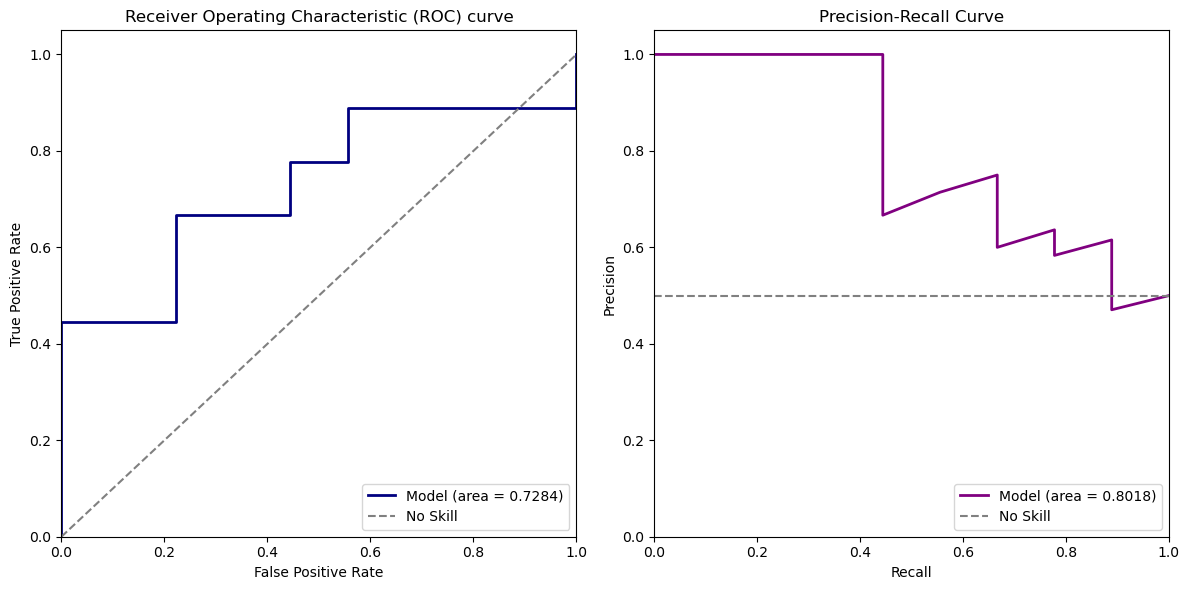

In [35]:
%matplotlib inline
model_GEMCITABINE.get_roc_pr_curves('GEMCITABINE', AggCategoricalAnnotatedTcgaDataset(is_train=False))

In [36]:
model_GEMCITABINE.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=False))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,GEMCITABINE,54,0.132914,0.338002,0.153341,0.268285


In [37]:
model_GEMCITABINE.get_velodrome_results_df(AggCategoricalAnnotatedCellLineDataset(is_train=True))

/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:541: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  w_n = torch.nn.functional.softmax(torch.stack(ws), dim=None)
/home/nicole/code/cancer-drug-response-prediction/notebook/../src/VelodromeModel.py:545: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TX_val = torch.tensor(


,drug_name,length_dataset,spearmanr_correlation,spearmanr_pvalue,pearsonr_correlation,pearsonr_pvalue
0,GEMCITABINE,483,0.238871,1.076960e-07,0.17744,0.000088
